In [2]:
# import packages
import glob
from pathlib import Path
import os
import numpy as np
from datetime import datetime
from datetime import timedelta
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [3]:
work_dir=Path("/scratch/fransjevanoors/global_sr")

## 1. Where irrigation?
Use GSIM irrigation data for catchments

In [4]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
ir = df.ir_mean
np.max(ir)

0.3983825

Text(0.5, 0.98, 'Fraction of irrigated area in catchment')

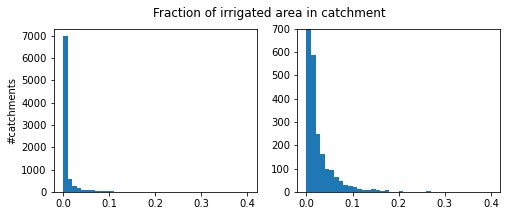

In [5]:
fig = plt.figure(figsize=(8,3))
bins = np.linspace(0,0.4,41)
ax = fig.add_subplot(121)
ax.hist(ir,bins=bins)
ax.set_ylabel(f'#catchments')

ax = fig.add_subplot(122)
ax.hist(ir,bins=bins)
# ax.set_ylabel(f'#catchments')
ax.set_ylim(0,700)

fig.suptitle('Fraction of irrigated area in catchment')

Text(0.5, 1.0, 'Fraction of irrigated area in catchment')

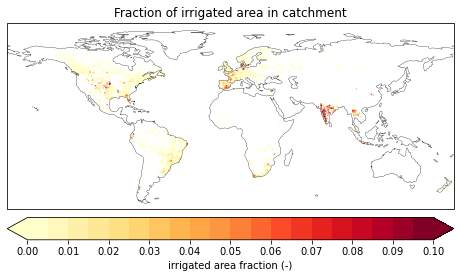

In [6]:
cmap = plt.cm.YlOrRd  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)]
cm2 = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,0.1,21)
bounds2 = np.linspace(0,0.1,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df.lon,df.lat,c=df.ir_mean,s=0.1,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='irrigated area fraction (-)',spacing='proportional',extend='both', pad=0.02, norm=norm,ticks=bounds2)
ax.set_title(f'Fraction of irrigated area in catchment',size=12)

Text(0.5, 1.0, 'irrigated area fraction >0.05')

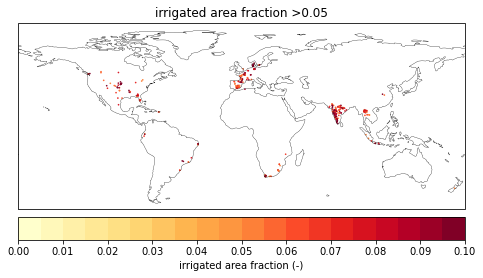

In [7]:
df = df[df.ir_mean>0.05]
# cmap = plt.cm.jet  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)]
cm2 = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,0.1,21)
bounds2 = np.linspace(0,0.1,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df.lon,df.lat,c=df.ir_mean,s=0.4,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='irrigated area fraction (-)',spacing='proportional', pad=0.02, norm=norm,ticks=bounds2)
ax.set_title(f'irrigated area fraction >0.05',size=12)

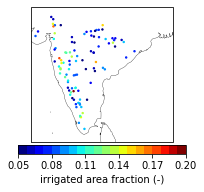

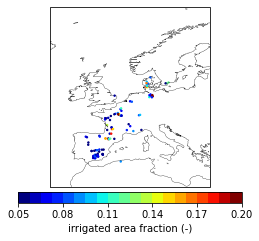

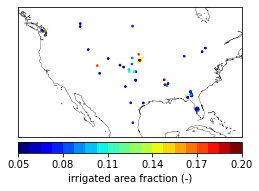

In [8]:
cmap = plt.cm.jet  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)]
cm2 = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0.05,0.2,21)
bounds2 = np.linspace(0.05,0.2,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# INDIA
bounds3 = np.linspace(0.05,0.2,6)
fig = plt.figure(figsize=(3,3))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(70,90)
ax.set_ylim(7,26)
s = ax.scatter(df.lon,df.lat,c=df.ir_mean,s=2,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='irrigated area fraction (-)',spacing='proportional', pad=0.02, norm=norm,ticks=bounds3)


# EUROPE
bounds3 = np.linspace(0.05,0.2,6)
fig = plt.figure(figsize=(4,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-15,25)
ax.set_ylim(30,75)
s = ax.scatter(df.lon,df.lat,c=df.ir_mean,s=2,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='irrigated area fraction (-)',spacing='proportional', pad=0.02, norm=norm,ticks=bounds3)


# USA
bounds3 = np.linspace(0.05,0.2,6)
fig = plt.figure(figsize=(4,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-130,-70)
ax.set_ylim(20,55)
s = ax.scatter(df.lon,df.lat,c=df.ir_mean,s=3,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='irrigated area fraction (-)',spacing='proportional', pad=0.02, norm=norm,ticks=bounds3)


In [9]:
# make list of catchments with > 5% irrigation
df = df[df.ir_mean>0.05]
c = df.index.values
np.savetxt(f'{work_dir}/output/irrigation/catchment_irri_area_5percent.txt',c,fmt='%s')

In [11]:
# IWU IRRIGATION DATA
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)

iwu = pd.read_csv(f'{work_dir}/output/irrigation/mean_irrigation_all_catchments.csv',index_col=0)
df2 = pd.concat([df,iwu],axis=1)
df2['iwu_mean_mmyear']=df2['iwu_mean_mmday']*365
df2

,p_mean,ep_mean,q_mean,t_mean,ai,hai,tdiff_max,tdiff_mean,idu_mean,idu_max,...,slp_min,slp_std,cla,snd,slt,tpi,lat,lon,iwu_mean_mmday,iwu_mean_mmyear
de_0000778,4.045309,2.057641,0.842493,7.638991,1.965994,0.337366,24.641665,20.637500,2.86,16.13,...,0.403270,7.677587,7.574111,11.43850,15.163390,1.40614,47.723927,11.933343,0.000000,0.000000
br_0001850,4.186528,2.943133,1.030596,25.107997,1.422473,0.967762,6.181352,4.359281,7.14,72.03,...,0.036460,1.452261,21.465250,30.03281,11.571600,3.32628,-16.616687,-49.718967,0.009453,3.450305
ca_0003156,1.235331,1.331096,0.017540,3.742158,0.928056,1.003734,43.900205,36.056585,5.33,30.03,...,0.000000,0.412188,13.336140,18.63596,17.658500,3.64355,49.506681,-103.275867,0.000056,0.020438
br_0001299,3.123837,2.907271,1.032392,24.338485,1.074491,1.257753,6.634216,5.093589,4.47,24.80,...,0.126978,2.651690,14.335770,22.00644,6.715627,2.06243,-17.108293,-39.967427,0.002138,0.780316
br_0001843,4.453621,2.944259,1.377108,24.223189,1.512646,0.877896,6.469796,4.538261,7.15,73.73,...,0.153662,1.180128,18.867120,24.71507,9.273455,2.71033,-16.539263,-49.184522,0.009306,3.396778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ca_0001384,3.196726,1.852481,2.053996,2.880652,1.725645,0.341004,40.004254,33.168757,2.74,11.63,...,0.002320,2.461829,5.288717,22.22545,15.004920,2.14825,47.253879,-72.245291,0.000000,0.000000
us_0001647,3.412146,2.749842,2.050785,18.061075,1.240852,0.855017,24.183295,20.816630,4.07,18.73,...,0.154006,0.249567,12.236070,35.50068,15.771400,3.79075,33.018864,-83.604070,0.000000,0.000000
gb_0000044,2.269773,1.157692,1.016338,9.472414,1.960603,0.677501,17.949959,13.999706,3.36,17.43,...,0.187004,1.120093,14.062060,22.81675,27.029190,3.33438,53.261171,-1.396872,0.001495,0.545641
br_0000392,4.171185,3.215613,1.172224,25.953768,1.297166,1.004279,4.744549,3.214524,9.28,87.60,...,0.000000,2.562056,15.720090,32.02823,10.318910,3.27995,-12.531370,-47.860721,0.001584,0.578340


Text(0.5, 0.98, 'Mean irrigation water use (mm/year)')

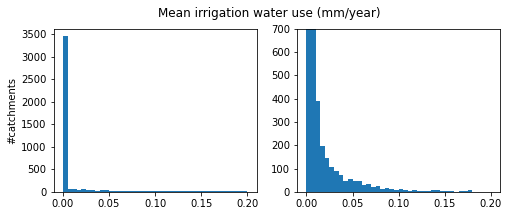

In [12]:
# histogram of IWU data
fig = plt.figure(figsize=(8,3))
bins = np.linspace(0,0.2,41)
ax = fig.add_subplot(121)
ax.hist(df2.iwu_mean_mmyear,bins=bins)
ax.set_ylabel(f'#catchments')

ax = fig.add_subplot(122)
ax.hist(ir,bins=bins)
# ax.set_ylabel(f'#catchments')
ax.set_ylim(0,700)

fig.suptitle('Mean irrigation water use (mm/year)')

Text(0.5, 1.0, 'Mean irrigation water use (mm/year)')

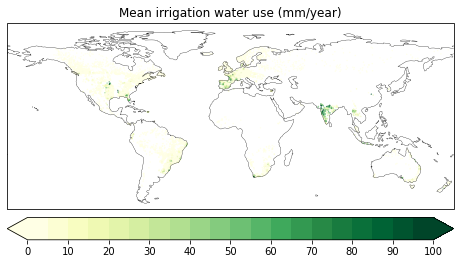

In [23]:
cmap = plt.cm.YlGn  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)]
cm2 = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,100,21)
bounds2 = np.linspace(0,100,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df2.lon,df2.lat,c=df2.iwu_mean_mmyear,s=0.1,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='',spacing='proportional',extend='both', pad=0.02, norm=norm,ticks=bounds2)
ax.set_title(f'Mean irrigation water use (mm/year)',size=12)

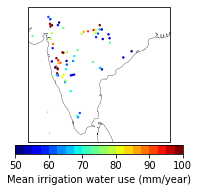

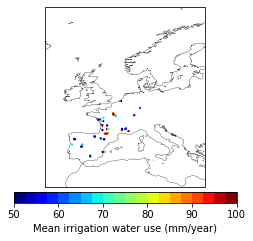

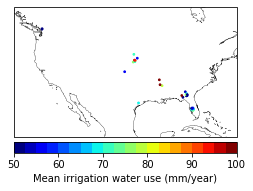

In [31]:
df2 = df2[df2.iwu_mean_mmyear>50]
cmap = plt.cm.jet  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)]
cm2 = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(50,100,21)
bounds2 = np.linspace(50,100,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# INDIA
bounds3 = np.linspace(50,100,6)
fig = plt.figure(figsize=(3,3))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(70,90)
ax.set_ylim(7,26)
s = ax.scatter(df2.lon,df2.lat,c=df2.iwu_mean_mmyear,s=2,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='Mean irrigation water use (mm/year)',spacing='proportional', pad=0.02, norm=norm,ticks=bounds3)


# EUROPE
# bounds3 = np.linspace(0.05,0.2,6)
fig = plt.figure(figsize=(4,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-15,25)
ax.set_ylim(30,75)
s = ax.scatter(df2.lon,df2.lat,c=df2.iwu_mean_mmyear,s=2,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='Mean irrigation water use (mm/year)',spacing='proportional', pad=0.02, norm=norm,ticks=bounds3)


# USA
# bounds3 = np.linspace(0.05,0.2,6)
fig = plt.figure(figsize=(4,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
ax.set_xlim(-130,-70)
ax.set_ylim(20,55)
s = ax.scatter(df2.lon,df2.lat,c=df2.iwu_mean_mmyear,s=3,cmap=cm2, norm=norm)
cbar = plt.colorbar(s, orientation='horizontal', label='Mean irrigation water use (mm/year)',spacing='proportional', pad=0.02, norm=norm,ticks=bounds3)


## 2. Timeseries for 1 irri catchment

In [108]:
c = np.loadtxt(f'{work_dir}/output/irrigation/catchment_irri_area_5percent.txt',dtype=str)
c = c[36]
c

'in_0000196'

In [109]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/catchment_characteristics_gswp-p_gleam-ep_gswp-t.csv',index_col=0)
ir = df.ir_mean
c_ir = ir.loc[c]
print(f'The irrigated area fraction in catchment {c} is {c_ir}')

The irrigated area fraction in catchment in_0000196 is 0.1015391


Text(0.5, 1.0, 'monthly mean IWU in catchment in_0000196')

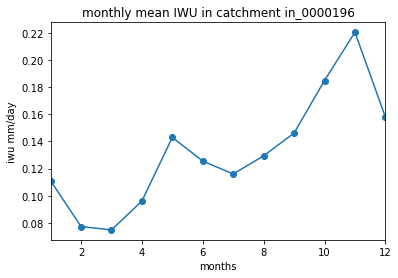

In [110]:
# IWU
iwu = pd.read_csv(f'{work_dir}/output/irrigation/processed/monthly_mean/{c}.csv',index_col=0)
plt.plot(iwu, '-o')
plt.xlim(1,12)
plt.ylabel('iwu mm/day')
plt.xlabel('months')
plt.title(f'monthly mean IWU in catchment {c}')

Text(0.5, 1.0, 'monthly mean Sd in catchment in_0000196')

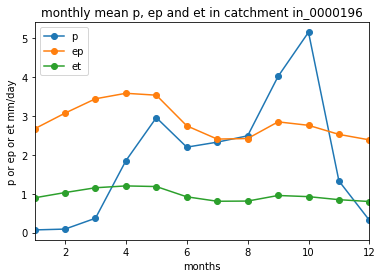

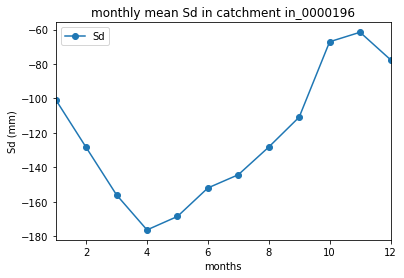

In [111]:
# load sd calculation output with p, ep, et, and sd
s = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/{c}.csv',index_col=0)
s.index = pd.to_datetime(s.index)
smm = s.groupby([s.index.month]).mean()

plt.plot(smm.p, '-o',label='p')
plt.plot(smm.ep, '-o',label='ep')
plt.plot(smm.Et, '-o',label='et')
plt.legend()
plt.xlim(1,12)
plt.ylabel('p or ep or et mm/day')
plt.xlabel('months')
plt.title(f'monthly mean p, ep and et in catchment {c}')

plt.figure()
plt.plot(smm.Sd, '-o',label='Sd')
plt.legend()
plt.xlim(1,12)
plt.ylabel('Sd (mm)')
plt.xlabel('months')
plt.title(f'monthly mean Sd in catchment {c}')

In [112]:
pep_dir = f'{work_dir}/output/forcing_timeseries/processed/daily'
q_dir = f'{work_dir}/output/q_timeseries_selected'
out_dir = f'{work_dir}/output/sr_calculation/sd_catchments'
snow_ids = np.genfromtxt(f'{work_dir}/output/snow/catch_id_list_snow_t_and_p.txt',dtype='str')
snow_dir = f'{work_dir}/output/snow/timeseries'

catch_id_list = [c]
pep_dir_list = [pep_dir] 
q_dir_list = [q_dir] 
out_dir_list = [out_dir] 
snow_id_list = snow_ids
snow_dir_list = [snow_dir]
catch_id=c

In [113]:
snow_id_list

array(['ar_0000023', 'ar_0000024', 'ar_0000025', ..., 'us_0008723',
       'us_0008726', 'us_0008766'], dtype='<U10')

In [114]:
s = 0 # snow is no
# get P Ep and Q files for catch id
f_pep = glob.glob(f'{pep_dir}/{catch_id}*.csv')

# read q df
f_q = glob.glob(f'{q_dir}/{catch_id}*.csv')

# read files as dataframes
q_ts = pd.read_csv(f_q[0],index_col=0)
q_ts.index = pd.to_datetime(q_ts.index)
pep_ts = pd.read_csv(f_pep[0],index_col=0)
pep_ts.index = pd.to_datetime(pep_ts.index)

# convert to monthly dataframes
df_monthly = pd.DataFrame(index=pd.date_range(pep_ts.index[0],pep_ts.index[-1],freq='M'), columns=['p','ep'])
df_monthly[['p','ep']] = pep_ts[['p','ep']].groupby(pd.Grouper(freq="M")).sum()

# calculate start hydroyear -> month after on average the wettest month
df_monthly_mean = df_monthly.groupby([df_monthly.index.month]).mean()
wettest_month = (df_monthly_mean['p']-df_monthly_mean['ep']).idxmax()
hydro_year_start_month = wettest_month+1
if hydro_year_start_month==13:
    hydro_year_start_month=1

# find the start and end date for the sr calculation based on P, Ep, Q timeseries and hydroyear
p_ep_start_year = pep_ts.index.year[0]
q_start_year = int(q_ts.index[0].year)
p_ep_end_year = pep_ts.index.year[-1]
q_end_year = int(q_ts.index[-1].year)

# test if timeseries have overlap -> if not don't continue the sd calculation
if q_start_year>p_ep_end_year:
    a=1
elif p_ep_start_year>q_end_year:
    a=1
else:
    a=0
    start_year = max(q_start_year,p_ep_start_year)
    end_year = min(q_end_year,p_ep_end_year)
    start_date = datetime(start_year,hydro_year_start_month,1)
    end_date = datetime(end_year,hydro_year_start_month,1)
    end_date = end_date - timedelta(days=1)

    #calculate mean Q for startdate enddate timeseries
    q_mean = q_ts.loc[start_date:end_date,'Q'].mean()

    # prepare input dataframe for sd calculation
    sd_input = pd.DataFrame(index=pd.date_range(start_date,end_date,freq='d'), columns=['p','ep','date_start','date_end'])
    sd_input[['p','ep']] = pep_ts[['p','ep']]
    sd_input[['date_start','date_end']] = start_date, end_date
    si_0 = 0 #initial interception storage
    si_max = 2.5 #maximum interception storage

    # # run sd calculation
    # b = sd_initial(sd_input, si_0, si_max, q_mean,s)[0] #b==0: closing wb, b==1: non-closing wb > no sd calculation
    # if b==0:      
    #     # save output dataframe from sd calculation
    #     out = sd_initial(sd_input, si_0, si_max, q_mean,s)[1]
    #     # out.to_csv(f'{out_dir}/{catch_id}.csv')

In [115]:
df = sd_input

# add year if the start date is earlier than the timeseries (e.g. startdate 02-01, timeseries starts 02-28) 
if df.index[0]>df.date_start[0]:
    df.date_start = df.date_start[0] + relativedelta(years=1)

# select time period of interest
df = df.loc[df.date_start[0]:df.date_end[0]]

# add empty columns for interception storage calculation
df.loc[:,'Si_1'] = np.nan
df.loc[:,'Pe'] = np.nan
df.loc[:,'Si_2'] = np.nan
df.loc[:,'Ei'] = np.nan
df.loc[:,'Si_3'] = np.nan
df.loc[:,'Et'] = np.nan
df.loc[:,'Sd'] = np.nan

# convert to numpy arrays (to speed up calculations)
p = np.array(df.p.values)
ep = np.array(df.ep.values)

if (s==1):
    pl = np.array(df.pl.values)
    pm = np.array(df.pm.values)

si1 = np.zeros(len(df))
pe = np.zeros(len(df))
pef = np.zeros(len(df))
si2 = np.zeros(len(df))
ei = np.zeros(len(df))
si3 = np.zeros(len(df))
et = np.zeros(len(df))
sd = np.zeros(len(df))

if (s==1): # snow
    #calculate interception storage and effective precipitation for all timesteps
    for l in range(1,len(si1)):
        # first timestep l=0
        si1[0] = pl[0] + si_0
        pef[0] = max(0,si1[0]-si_max)
        si2[0] = si1[0] - pef[0]
        ei[0] = min(si2[0],ep[0])
        si3[0] = max(0,si2[0]-ei[0])

        pe[0] = pef[0]+pm[0]

        # timestep 1 to end
        si1[l] = pl[l] + si3[l-1]
        pef[l] = max(0,si1[l]-si_max)
        si2[l] = si1[l] - pef[l]
        ei[l] = min(si2[l],ep[l])
        si3[l] = max(0,si2[l]-ei[l])

        pe[l] = pef[l]+pm[l]

else: # no snow
    #calculate interception storage and effective precipitation for all timesteps
    for l in range(1,len(si1)):
        # first timestep l=0
        si1[0] = p[0] + si_0
        pe[0] = max(0,si1[0]-si_max)
        si2[0] = si1[0] - pe[0]
        ei[0] = min(si2[0],ep[0])
        si3[0] = max(0,si2[0]-ei[0])

        # timestep 1 to end
        si1[l] = p[l] + si3[l-1]
        pe[l] = max(0,si1[l]-si_max)
        si2[l] = si1[l] - pe[l]
        ei[l] = min(si2[l],ep[l])
        si3[l] = max(0,si2[l]-ei[l])

#calculate Et from the catchment water balance (Et = Pe-Q)
Pe_mean = np.mean(pe)
EP_mean = np.mean(ep)
Q_mean = q_mean #q_mean from other file than p and e because yearly timeseries
Et_mean = Pe_mean - Q_mean

/home/fransjevanoors/.conda/envs/sr_env/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [116]:
sir = np.zeros(len(df))
se = np.zeros(len(df))

In [117]:
#check if water balance is ok
if Et_mean<0: # if this is the case, it is not possible to calculate sd
    b = 1 # wb not ok
    sd[:] = np.nan
    et[:]=np.nan
else:
    b = 0 # wb ok
    #calculate daily Et (EP(daily)*(Et_sum/EP_sum)) and Sd
    for l in range(1,np.size(df.index)):
        # sd for timestep 0
        et[0] = ep[0]/EP_mean * Et_mean
        sd[0] = min(0,pe[0] - et[0])

        # sd for timestep 1 - end
        et[l] = ep[l]/EP_mean * Et_mean
        sd[l] = min(0,sd[l-1]+pe[l]-et[l])
        
        if (sd[l]==0):
            se[l] = pe[l]-et[l]

# add numpy arrays to dataframe
df.Si_1 = si1
df.Si_2 = si2
df.Si_3 = si3
df.Pe = pe
df.Ei = ei
df.Sd = sd
df.Et = et
df['se'] = se

/home/fransjevanoors/.conda/envs/sr_env/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/tmp/ipykernel_1236188/3380728886.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['se'] = se


In [118]:
# load sd calculation output with p, ep, et, and sd
s = df
s.index = pd.to_datetime(s.index)
sm = s.groupby(pd.Grouper(freq='M')).mean()
s

,p,ep,date_start,date_end,Si_1,Pe,Si_2,Ei,Si_3,Et,Sd,se
1981-11-01,4.970450,2.733153,1981-11-01,2010-10-31,4.970450,2.470450,2.500000,2.500000,0.000000,0.915542,0.000000,0.000000
1981-11-02,0.099272,1.858117,1981-11-01,2010-10-31,0.099272,0.000000,0.099272,0.099272,0.000000,0.622425,-0.622425,0.000000
1981-11-03,1.284005,2.460220,1981-11-01,2010-10-31,1.284005,0.000000,1.284005,1.284005,0.000000,0.824116,-1.446541,0.000000
1981-11-04,0.120775,2.550503,1981-11-01,2010-10-31,0.120775,0.000000,0.120775,0.120775,0.000000,0.854358,-2.300900,0.000000
1981-11-05,6.851115,1.561375,1981-11-01,2010-10-31,6.851115,4.351115,2.500000,1.561375,0.938625,0.523024,0.000000,3.828091
...,...,...,...,...,...,...,...,...,...,...,...,...
2010-10-27,9.730287,2.306248,1981-11-01,2010-10-31,9.730287,7.230287,2.500000,2.306248,0.193752,0.772539,-9.936000,0.000000
2010-10-28,0.896402,3.003489,1981-11-01,2010-10-31,1.090153,0.000000,1.090153,1.090153,0.000000,1.006098,-10.942099,0.000000
2010-10-29,0.038693,2.378201,1981-11-01,2010-10-31,0.038693,0.000000,0.038693,0.038693,0.000000,0.796641,-11.738740,0.000000
2010-10-30,2.014450,1.914228,1981-11-01,2010-10-31,2.014450,0.000000,2.014450,1.914228,0.100222,0.641221,-12.379961,0.000000


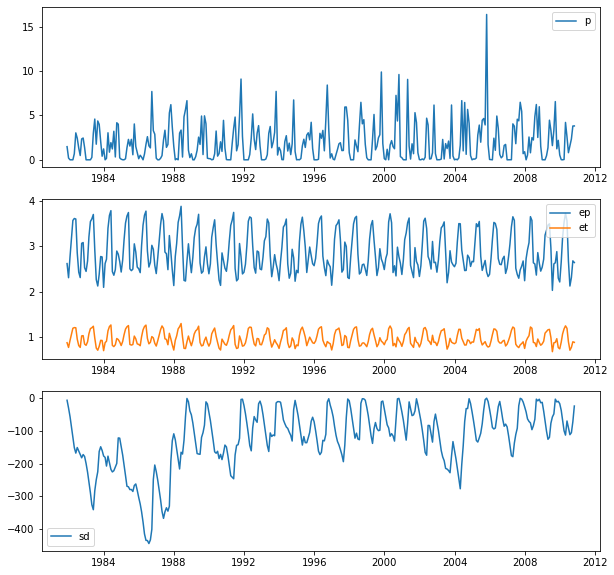

In [119]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(311)
ax.plot(sm.index,sm.p,label='p')
ax.legend()

ax = fig.add_subplot(312)
ax.plot(sm.index,sm.ep,label='ep')
ax.plot(sm.index,sm.Et,label='et')
ax.legend()

ax = fig.add_subplot(313)
ax.plot(sm.index,sm.Sd,label='sd')
ax.legend()

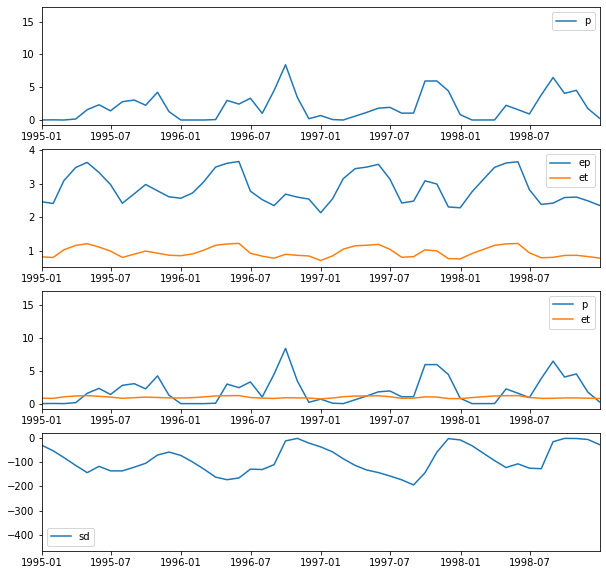

In [120]:
start = datetime(1995,1,1)
end = datetime(1998,12,31)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(411)
ax.plot(sm.index,sm.p,label='p')
ax.set_xlim(start,end)
ax.legend()

ax = fig.add_subplot(412)
ax.plot(sm.index,sm.ep,label='ep')
ax.plot(sm.index,sm.Et,label='et')
ax.set_xlim(start,end)
ax.legend()

ax = fig.add_subplot(413)
ax.plot(sm.index,sm.p,label='p')
ax.plot(sm.index,sm.Et,label='et')
ax.set_xlim(start,end)
ax.legend()

ax = fig.add_subplot(414)
ax.plot(sm.index,sm.Sd,label='sd')
ax.set_xlim(start,end)
ax.legend()

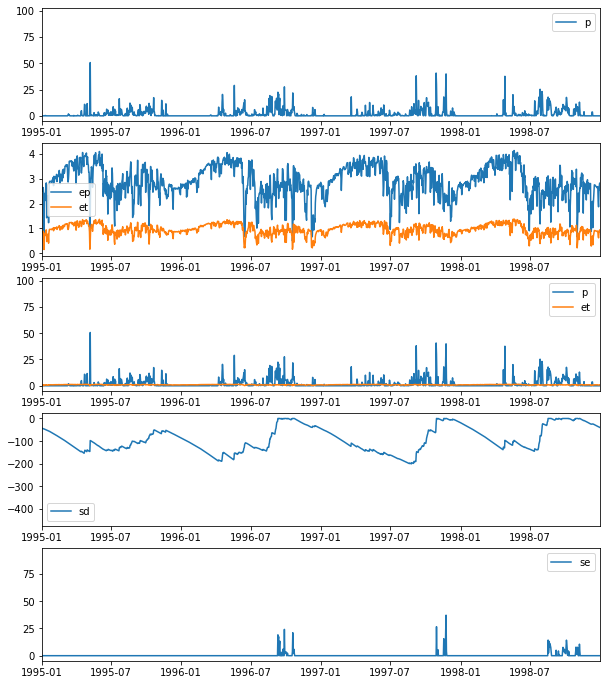

In [121]:
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(511)
ax.plot(s.index,s.p,label='p')
ax.set_xlim(start,end)
ax.legend()

ax = fig.add_subplot(512)
ax.plot(s.index,s.ep,label='ep')
ax.plot(s.index,s.Et,label='et')
ax.set_xlim(start,end)
ax.legend()

ax = fig.add_subplot(513)
ax.plot(s.index,s.p,label='p')
ax.plot(s.index,s.Et,label='et')
ax.set_xlim(start,end)
ax.legend()

ax = fig.add_subplot(514)
ax.plot(s.index,s.Sd,label='sd')
ax.set_xlim(start,end)
ax.legend()

ax = fig.add_subplot(515)
ax.plot(s.index,s.se,label='se')
ax.set_xlim(start,end)
ax.legend()

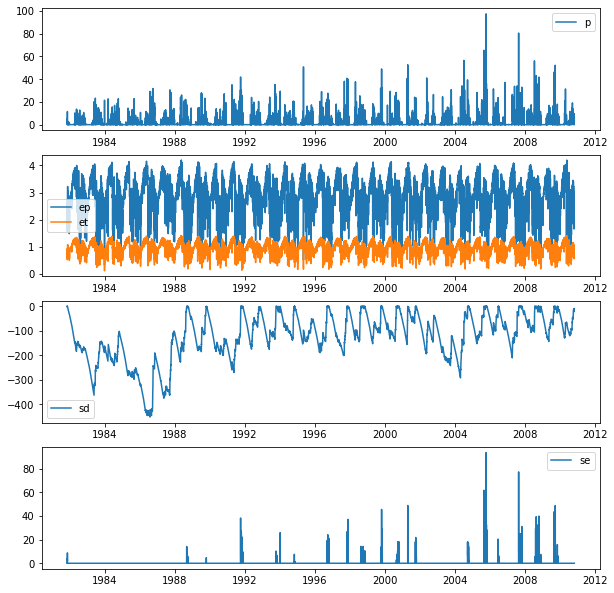

In [122]:
ss = s.loc[start_date:end_date]
fig = plt.figure(figsize=(10,13))
ax = fig.add_subplot(511)
ax.plot(ss.index,ss.p,label='p')
ax.legend()

ax = fig.add_subplot(512)
ax.plot(ss.index,ss.ep,label='ep')
ax.plot(ss.index,ss.Et,label='et')
ax.legend()

ax = fig.add_subplot(513)
ax.plot(ss.index,ss.Sd,label='sd')
ax.legend()

ax = fig.add_subplot(514)
ax.plot(ss.index,ss.se,label='se')
ax.legend()

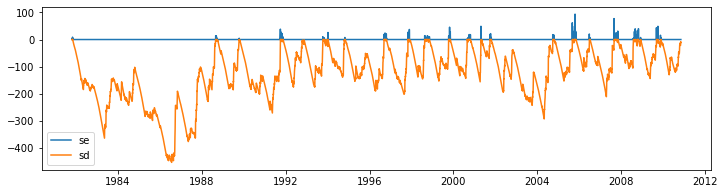

In [134]:
# plt.plot(s.se.index[0:730],s.se[0:730],label='se')
# plt.plot(s.Sd.index[0:730],s.Sd[0:730],label='sd')
# plt.legend()

plt.figure(figsize=(12,3))
plt.plot(s.se.index,s.se,label='se')
plt.plot(s.Sd.index,s.Sd,label='sd')
plt.legend()

In [135]:
years=len(np.unique(s.index.year))
start_date = s.index[0]
split_dates = []
split_dates.append(start_date)
s['se_yearly'] = np.zeros(len(s))
s['f_irri'] = np.zeros(len(s))
for i in range(years):
    ss = s.iloc[i*365:(i*365)+365]
    min_date = ss[ss.Sd==ss.Sd.min()].index.values[0]
    split_dates.append(min_date)

for i in range(years):
    sp = s.loc[split_dates[i]:split_dates[i+1]]
    se_sum = sp.se.sum()
    # print(se_sum)
    s['se_yearly'].loc[split_dates[i]:split_dates[i+1]] = [sp.se.sum()]*len(sp)
    
se_avg = s['se_yearly'].mean()
irri = iwu.mean() * 365
f = (irri/se_avg).values[0]
s['f_irri']=[f]*len(s)

print(irri)
print(se_avg)

iwu_mmday    48.130352
dtype: float64
114.81268353019358


/tmp/ipykernel_1236188/3502176494.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['se_yearly'] = np.zeros(len(s))
/tmp/ipykernel_1236188/3502176494.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['f_irri'] = np.zeros(len(s))
/home/fransjevanoors/.conda/envs/sr_env/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

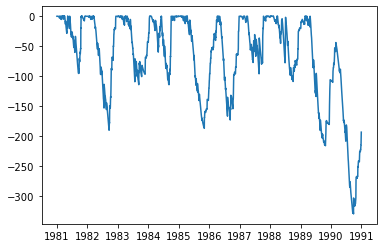

In [102]:
plt.plot(s.Sd)

In [103]:
# get sd, start and end year and date from sd_table
sd_table = s
Sd = sd_table.Sd
year_start = sd_table.index[0].year
year_end = sd_table.index[-1].year
date_start = str(sd_table.index[0].month)+'-'+str(sd_table.index[0].day)
date_end = str(sd_table.index[-1].month)+'-'+str(sd_table.index[-1].day)
if(date_end=='2-29'):
    date_end='2-28'
    
rp_array = [2,3,5,10,20,30,40,50,60,70,80]

In [104]:
Sd = Sd*-1

# count years
total_years = year_end - year_start
years = range(year_start,year_end+1,1)

# calculate annual max Sd - without iterations for hydro years
# CHECK THIS PROCEDURE AGAIN FRANSJE
Sd_max=[]
Sd_maxmin = []
if (str(date_start)=='1-1'):
    for i in range(0,total_years+1,1):
        sd_max_i = max(Sd.loc[str(years[i])+'-'+str(date_start):str(years[i])+'-'+str(date_end)]) #max value
        Sd_max.append(sd_max_i) #append max deficit per year
        # print(str(years[i])+'-'+str(date_start), str(years[i])+'-'+str(date_end))

        sd_max_ix = Sd.loc[str(years[i])+'-'+str(date_start):str(years[i])+'-'+str(date_end)].idxmax() #find index of max value
        sd_hystart_maxvalue = Sd.loc[str(years[i])+'-'+str(date_start):sd_max_ix] #timeseries from start hydroyear to index of max value
        min_value = min(sd_hystart_maxvalue) #find min value in timeseries before max value
        Sd_maxmin.append(sd_max_i-min_value) #append max-min sd per year
else:
    for i in range(0,total_years,1):
        sd_max_i = max(Sd.loc[str(years[i])+'-'+str(date_start):str(years[i+1])+'-'+str(date_end)]) #max value
        Sd_max.append(sd_max_i) #append max deficit per year
        # print(str(years[i])+'-'+str(date_start), str(years[i+1])+'-'+str(date_end))

        sd_max_ix = Sd.loc[str(years[i])+'-'+str(date_start):str(years[i+1])+'-'+str(date_end)].idxmax() #find index of max value
        sd_hystart_maxvalue = Sd.loc[str(years[i])+'-'+str(date_start):sd_max_ix] #timeseries from start hydroyear to index of max value
        min_value = min(sd_hystart_maxvalue) #find min value in timeseries before max value
        Sd_maxmin.append(sd_max_i-min_value) #append max-min sd per year


In [105]:
Sd_maxmin

[95.65100072126342,
 190.54482418305417,
 114.38981766013933,
 114.27212249219664,
 187.2941265698158,
 173.43463694243167,
 96.2373134448583,
 109.04060891176766,
 216.44205545397244,
 286.4760938128661]

In [106]:
# gumbel function
def gumbel_r_mom(x):
    """
    gumbel extreme value analysis
    x:        list of max sd values per year
    returns:  loc and scale of gumbel distribution

    """
    scale = np.sqrt(6)/np.pi * np.std(x)
    loc = np.mean(x) - np.euler_gamma*scale
    return loc, scale    

# calculate gumbel parameters
# loc1, scale1 = gumbel_r_mom(Sd_maxmin_rz_year)
loc1, scale1 = gumbel_r_mom(Sd_maxmin)

# find Sd value corresponding with return period
Sd_T = []
for i in np.arange(0,len(rp_array),1):
    p = 1-(1/rp_array[i])
    y = -np.log(-np.log(p))
    x = scale1 * y + loc1
    Sd_T.append(x)

In [107]:
sr_df = pd.DataFrame(index=[catch_id], columns=rp_array)
sr_df.loc[catch_id]=Sd_T
sr_df

,2,3,5,10,20,30,40,50,60,70,80
fr_0000824,148.52275,173.603575,201.538205,236.639049,270.308622,289.677896,303.333833,313.89043,322.497593,329.764322,336.052418
